In [2]:
# プロダクト開発演習
# mnistを用いて、訓練データが少ない時それらを回転したデータで水増しをすることによる精度の向上がどの程度か確かめる。

In [2]:
import os
import pickle
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from sklearn import datasets
from sklearn.model_selection import train_test_split
%matplotlib inline
# 乱数シードを指定
np.random.seed(seed=0)

(56000, 784)
(640, 784)
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


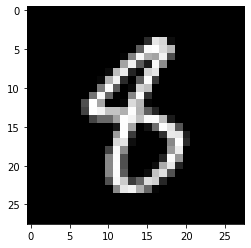

In [66]:
if os.path.exists('mnist_784'):
    with open('mnist_784','rb') as f:
        mnist = pickle.load(f)
else:
    mnist = datasets.fetch_openml('mnist_784')
    with open('mnist_784', 'wb') as f:
        pickle.dump(mnist, f)
# 訓練データ、テストデータを取ってくる
X, T = mnist.data, mnist.target
# 訓練データとテストデータに分ける
x_train, x_test, t_train, t_test = train_test_split(X, T, test_size=0.2)
# データの形を確認
print(x_train.shape)
#print(t_train.shape)
# 640個だけランダムにデータを抽出
x_train2 = np.zeros((640,784))
t_train2 = np.zeros(640)
perm = np.random.permutation(len(x_train))
for idx in range(640):
    x_train2[idx] = x_train[perm[idx]]
    t_train2[idx] = t_train[perm[idx]]
# int型のone-hot-vectorに変換
t_train = np.eye(10)[t_train.astype("int")]
t_train2 = np.eye(10)[t_train2.astype("int")]
t_test = np.eye(10)[t_test.astype("int")]
# 訓練データの形を確認
print(x_train2.shape)
#print(t_train2.shape)
#print(x_train2[0])
#noise = np.random.randint(0, 783 , 30)
#x_train2[0][noise] = 255.
# x_train2にノイズを加える
#for i in range(640):
#    noise = np.random.randint(0, 783 , 30) #0から783までの乱数を30個作る
#    x_train2[i][noise] = 255. #白
#    #x_train[i][noise] = (0,0,0) #黒
#for i in range(10): #初めの10個で確認
#    plt.imshow(x_train2[i].reshape((28,28)))
#    plt.show()
# x_train2を回転させる
print(t_train2[0])
x_train3 = x_train2[0].reshape((28, 28))
plt.imshow(x_train3)
plt.show()
img_30 = ndimage.rotate(x_train3, 30, reshape=False)
img_330 = ndimage.rotate(x_train3, 330, reshape=False)
#確認用
#plt.imshow(img_30)
#plt.show()
#plt.imshow(img_330)
#plt.show()
#30°回転
x_train30_0 = x_train2.reshape((640, 28, 28))
x_train30 = np.zeros((640, 784))
for i in range(640):
    x_train30_0[i] = ndimage.rotate(x_train30_0[i], 30, reshape=False)
    x_train30[i] = x_train30_0[i].reshape((784))
#plt.imshow(x_train30[1].reshape((28,28)))
#plt.show()
#330°回転
x_train330_0 = x_train2.reshape((640, 28, 28))
x_train330 = np.zeros((640, 784))
for i in range(640):
    x_train330_0[i] = ndimage.rotate(x_train330_0[i], 330, reshape=False)
    x_train330[i] = x_train330_0[i].reshape((784))
#plt.imshow(x_train330[1].reshape((28,28)))
#plt.show()
#15°回転
x_train15_0 = x_train2.reshape((640, 28, 28))
x_train15 = np.zeros((640, 784))
for i in range(640):
    x_train15_0[i] = ndimage.rotate(x_train15_0[i], 30, reshape=False)
    x_train15[i] = x_train15_0[i].reshape((784))
#plt.imshow(x_train15[5].reshape((28,28)))
#plt.show()
#345°回転
x_train345_0 = x_train2.reshape((640, 28, 28))
x_train345 = np.zeros((640, 784))
for i in range(640):
    x_train345_0[i] = ndimage.rotate(x_train345_0[i], 30, reshape=False)
    x_train345[i] = x_train345_0[i].reshape((784))
#plt.imshow(x_train345[5].reshape((28,28)))
#plt.show()
#10°回転
x_train10_0 = x_train2.reshape((640, 28, 28))
x_train10 = np.zeros((640, 784))
for i in range(640):
    x_train10_0[i] = ndimage.rotate(x_train10_0[i], 10, reshape=False)
    x_train10[i] = x_train10_0[i].reshape((784))
#plt.imshow(x_train10[5].reshape((28,28)))
#plt.show()
#350°回転
x_train350_0 = x_train2.reshape((640, 28, 28))
x_train350 = np.zeros((640, 784))
for i in range(640):
    x_train350_0[i] = ndimage.rotate(x_train350_0[i], 350, reshape=False)
    x_train350[i] = x_train350_0[i].reshape((784))
#plt.imshow(x_train350[5].reshape((28,28)))
#plt.show()

In [5]:
class SGD:

    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

class Adam:

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        
        for key in params.keys():
            self.m[key] = self.beta1 * self.m[key] + (1 - self.beta1) * grads[key]
            self.v[key] = self.beta2 * self.v[key] + (1 - self.beta2) * grads[key]**2
            m_unbias = self.m[key] / (1-self.beta1 ** self.iter)
            v_unbias = self.v[key] / (1-self.beta2 ** self.iter)
            params[key] -= self.lr * m_unbias / (np.sqrt(v_unbias) + 1e-7)

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    if t.size == y.size:
        t = t.argmax(axis=1)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def softmax(x):
    x = x.T
    _x = x - np.max(x, axis=0)
    _x = np.exp(_x) / np.sum(np.exp(_x), axis=0)
    return _x.T

In [6]:
class mnistMultiLayerNet:
    """
    layer0: 784 次元の入力
    ↓ w1, b1 で線形結合
    ↓ relu で活性化
    layer1: 100 次元の隠れ層
    ↓ w2, b2 で線形結合
    ↓ relu で活性化
    layer2: 100 次元の隠れ層
    ↓ w3, b3 で線形結合
    ↓ relu で活性化
    layer3: 100 次元の隠れ層
    ↓ w4, b4 で線形結合
    ↓ relu で活性化
    layer4: 100 次元の隠れ層
    ↓ w5, b5 で線形結合
    layer5: 10 次元の出力層
    """
    def __init__(self):
        self.input_size = 784
        self.output_size = 10
        self.hidden_size_list = [100, 100, 100, 100]
        self.all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        self.hidden_layer_num = len(self.hidden_size_list)
        self.weight_decay_lambda =0
        self.params = {}
        self.layers = {}
        self.grads = {}

        # 重みとバイアスの初期化
        for idx in range(1, len(self.all_size_list)):
            self.params['w' + str(idx)] = np.random.randn(self.all_size_list[idx-1], self.all_size_list[idx]) * 0.085
            self.params['b' + str(idx)] = np.zeros(self.all_size_list[idx], dtype=float)

        
    def forward(self, x):
        relu = lambda x : np.maximum(0, x)  # 活性化関数として ReLU を使用
        self.layers['layer0'] = x
        for idx in range(1, len(self.all_size_list) - 1):
            w = self.params['w' + str(idx)]
            b = self.params['b' + str(idx)]
            x = self.layers['layer' + str(idx - 1)]
            self.layers['layer' + str(idx)] = relu(np.dot(x, w) + b)
        idx = len(self.all_size_list) - 1
        w = self.params['w' + str(idx)]
        b = self.params['b' + str(idx)]
        x = self.layers['layer' + str(idx - 1)]
        self.layers['layer' + str(idx)] = softmax(np.dot(x, w) + b)
        
        return self.layers['layer' + str(idx)]
        

    def loss(self, y, t):
        return cross_entropy_error(y, t)
    
    def backward(self, t, y):
        delta = (y - t) / t.shape[0]
        self.grads['b5'] = np.sum(delta, axis=0)
        self.grads['w5'] = np.dot(self.layers['layer4'].transpose(), delta)
        # 誤差逆伝播
        for idx in range(4, 0, -1):
            delta = np.dot(delta, self.params['w' + str(idx + 1)].transpose())
            delta = delta *  (self.layers['layer' + str(idx)] > 0)
            self.grads['b' + str(idx)] = np.sum(delta, axis=0)
            self.grads['w' + str(idx)] = np.dot(self.layers['layer'+str(idx - 1)].transpose(), delta)
        return self.grads


In [7]:
class mnistMultiLayerBatchNet:
    """
    layer0: 784 次元の入力
    ↓ w1, b1 で線形結合
    ↓バッチ正規化 gamma1倍しbeta1だけずらす
    ↓ relu で活性化
    layer1: 100 次元の隠れ層
    ↓ w2, b2 で線形結合
    ↓バッチ正規化 gamma2倍しbeta2だけずらす
    ↓ relu で活性化
    layer2: 100 次元の隠れ層
    ↓ w3, b3 で線形結合
    ↓バッチ正規化 gamma3倍しbeta3だけずらす
    ↓ relu で活性化
    layer3: 100 次元の隠れ層
    ↓ w4, b4 で線形結合
    ↓バッチ正規化 gamma4倍しbeta4だけずらす
    ↓ relu で活性化
    layer4: 100 次元の隠れ層
    ↓ w5, b5 で線形結合
    layer5: 10 次元の出力層
    """
    def __init__(self):
        self.input_size = 784
        self.output_size = 10
        self.hidden_size_list = [100, 100, 100, 100]
        self.all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        self.hidden_layer_num = len(self.hidden_size_list)
        self.weight_decay_lambda =0
        self.params = {}
        self.layers = {}
        self.grads = {}
        self.norms = {}
        self.momentum = 0.9

        # パラメータの初期化
        for idx in range(1, len(self.all_size_list)):
            # 線形結合層のパラメータ
            self.params['w' + str(idx)] = np.random.randn(self.all_size_list[idx-1], self.all_size_list[idx]) * 0.085
            self.params['b' + str(idx)] = np.zeros(self.all_size_list[idx], dtype=float)
            
            # バッチ正規化でシフトさせるときに用いるγとβを更新するパラメータとし初期化
            # mu と sigma は実行時の平均と分散
            if idx != len(self.all_size_list) - 1:
                self.params['gamma' + str(idx)] = np.ones(self.all_size_list[idx])
                self.params['beta' + str(idx)] = np.zeros(self.all_size_list[idx])
                self.norms['mu' + str(idx)] = None
                self.norms['var' + str(idx)] = None
        
    def forward(self, x, train_flg=False):
        relu = lambda x : np.maximum(0, x)  # 活性化関数として ReLU を使用
        self.layers['layer0'] = x
        for idx in range(1, len(self.all_size_list) - 1):
            # 線形結合層
            w = self.params['w' + str(idx)]
            b = self.params['b' + str(idx)]
            x = self.layers['layer' + str(idx - 1)]
            x = np.dot(x, w) + b
            
            # バッチ正規化
            # 平均と分散の初期化
            if self.norms['mu' + str(idx)] is None:
                N, D = x.shape
                self.norms['mu' + str(idx)] = np.zeros(D)
                self.norms['var' + str(idx)] = np.zeros(D)
            if train_flg:
                mu = x.mean(axis=0)           # 今回のミニバッチの平均
                xc = x - mu                   # 今回のミニバッチの平均との差分
                var = np.mean(xc**2, axis=0)  # 今回のミニバッチの分散
                std = np.sqrt(var + 10e-7)    # 今回のミニバッチの標準偏差
                xn = xc / std                 # 正規化

                # 全体の平均と分散を移動平均により求める
                self.norms['mu' + str(idx)] = self.momentum * self.norms['mu' + str(idx)] + (1-self.momentum) * mu
                self.norms['var' + str(idx)] = self.momentum * self.norms['var' + str(idx)] + (1-self.momentum) * var
                
                # 誤差逆伝播で使う中間データ
                self.norms['xc' + str(idx)] = xc
                self.norms['xn' + str(idx)] = xn
                self.norms['std' + str(idx)] = std
                self.norms['size' + str(idx)] = x.shape[0]
            else:
                # テスト時は全体の平均と分散を使って正規化
                xc = x - self.norms['mu' + str(idx)]
                xn = xc / ((np.sqrt(self.norms['var' + str(idx)] + 10e-7)))
                
            # バッチ正規化でシフト
            shifted = self.params['gamma' + str(idx)] * xn + self.params['beta' + str(idx)]
            
            # relu を使って活性化
            self.layers['layer' + str(idx)] = relu(shifted)

        # 出力層
        idx = len(self.all_size_list) - 1
        w = self.params['w' + str(idx)]
        b = self.params['b' + str(idx)]
        x = self.layers['layer' + str(idx - 1)]
        self.layers['layer' + str(idx)] = softmax(np.dot(x, w) + b)
        
        return self.layers['layer' + str(idx)]
        

    def loss(self, y, t):
        return cross_entropy_error(y, t)
    
    def backward(self, t, y):
        # 出力層における誤差の勾配（クロスエントロピー関数の勾配）
        delta = (y - t) / t.shape[0]
        
        # 出力層手前の線形結合層における勾配の逆伝播
        self.grads['b5'] = np.sum(delta, axis=0)
        self.grads['w5'] = np.dot(self.layers['layer4'].transpose(), delta)
        
        # 誤差逆伝播
        for idx in range(4, 0, -1):
            delta = np.dot(delta, self.params['w' + str(idx + 1)].transpose())
            
            # relu の微分
            delta = delta *  (self.layers['layer' + str(idx)] > 0)
            
            # バッチ正規化における勾配の逆伝播
            self.grads['beta' + str(idx)] = delta.sum(axis=0)
            self.grads['gamma' + str(idx)] = np.sum(self.norms['xn' + str(idx)] * delta, axis=0)
            dxn = self.params['gamma' + str(idx)] * delta
            dxc = dxn / self.norms['std' + str(idx)]
            dstd = -np.sum((dxn * self.norms['xc' + str(idx)]) / (self.norms['std' + str(idx)] * self.norms['std' + str(idx)]), axis=0)
            dvar = 0.5 * dstd / self.norms['std' + str(idx)]
            dxc += (2.0 / self.norms['size' + str(idx)]) * self.norms['xc' + str(idx)] * dvar
            dmu = np.sum(dxc, axis=0)
            delta = dxc - dmu / self.norms['size' + str(idx)]
            
            # 線形結合層における勾配の逆伝播
            self.grads['b' + str(idx)] = np.sum(delta, axis=0)
            self.grads['w' + str(idx)] = np.dot(self.layers['layer'+str(idx - 1)].transpose(), delta)
            
        return self.grads

In [62]:
bn = mnistMultiLayerBatchNet()
nobn = mnistMultiLayerNet()
adambn = mnistMultiLayerBatchNet()
adamnobn = mnistMultiLayerNet()

bn_acc_list = []
nobn_acc_list = []
adambn_acc_list = []
adamnobn_acc_list = []

sgd = SGD(lr = 0.01)
adam = Adam(lr=0.01)

# ミニバッチアルゴリズム
batch_size = 128

In [42]:
#データ数:640, 回転0
#データ数がかなり少ないためランダムな分割の仕方は少ないため、20EPOCH分割しても最後の方はほとんど変化はないと思われる。
for epoch in range(20):
    # ランダムにミニバッチへ分割するために、インデックスをランダムに並び替える
    perm = np.random.permutation(len(x_train2))
    # batch_size ごとにデータを読み込んで学習させる
    for idx in np.arange(0, len(perm), batch_size):
        x = x_train2[perm[idx:idx+batch_size]] 
        t =  t_train2[perm[idx:idx+batch_size]]
        
        y = bn.forward(x, train_flg=True)
        grads = bn.backward(t, y)
        sgd.update(bn.params,grads)
        
        y = adambn.forward(x, train_flg=True)
        grads = adambn.backward(t, y)
        adam.update(adambn.params,grads)
        
        y = nobn.forward(x)
        grads = nobn.backward(t,y)
        sgd.update(nobn.params, grads)
        
        y = adamnobn.forward(x)
        grads = adamnobn.backward(t, y)
        adam.update(adamnobn.params,grads)

    y_test = bn.forward(x_test)
    bn_acc_list.append((y_test.argmax(axis=1) == t_test.argmax(axis=1)).mean())
    y_test = nobn.forward(x_test)
    nobn_acc_list.append((y_test.argmax(axis=1) == t_test.argmax(axis=1)).mean())
    y_test = adambn.forward(x_test)
    adambn_acc_list.append((y_test.argmax(axis=1) == t_test.argmax(axis=1)).mean())
    y_test = adamnobn.forward(x_test)
    adamnobn_acc_list.append((y_test.argmax(axis=1) == t_test.argmax(axis=1)).mean())

    print(f'EPOCH {epoch + 1} | NoBatch ACCURACY (SGD) {nobn_acc_list[-1]:.2%} | Batch ACCURACY (SGD){bn_acc_list[-1]:.2%} | NoBatch ACCURACY (Adam){adamnobn_acc_list[-1]:.2%} | Batch ACCURACY (Adam) {adambn_acc_list[-1]:.2%}')

EPOCH 1 | NoBatch ACCURACY (SGD) 12.39% | Batch ACCURACY (SGD)9.96% | NoBatch ACCURACY (Adam)20.86% | Batch ACCURACY (Adam) 17.82%
EPOCH 2 | NoBatch ACCURACY (SGD) 17.20% | Batch ACCURACY (SGD)10.64% | NoBatch ACCURACY (Adam)23.00% | Batch ACCURACY (Adam) 24.63%
EPOCH 3 | NoBatch ACCURACY (SGD) 19.42% | Batch ACCURACY (SGD)12.64% | NoBatch ACCURACY (Adam)31.49% | Batch ACCURACY (Adam) 36.39%
EPOCH 4 | NoBatch ACCURACY (SGD) 21.86% | Batch ACCURACY (SGD)15.87% | NoBatch ACCURACY (Adam)34.79% | Batch ACCURACY (Adam) 40.78%
EPOCH 5 | NoBatch ACCURACY (SGD) 23.38% | Batch ACCURACY (SGD)18.47% | NoBatch ACCURACY (Adam)37.81% | Batch ACCURACY (Adam) 42.71%
EPOCH 6 | NoBatch ACCURACY (SGD) 24.59% | Batch ACCURACY (SGD)20.59% | NoBatch ACCURACY (Adam)37.82% | Batch ACCURACY (Adam) 44.34%
EPOCH 7 | NoBatch ACCURACY (SGD) 25.91% | Batch ACCURACY (SGD)22.51% | NoBatch ACCURACY (Adam)40.66% | Batch ACCURACY (Adam) 45.69%
EPOCH 8 | NoBatch ACCURACY (SGD) 26.87% | Batch ACCURACY (SGD)24.05% | NoBatc

In [76]:
#データ数:1920, 回転0,15, 345
#データ数640しか使っていないが、回転させてデータを増やしたことにより精度が全体的に1.5倍程度上昇。
#データの種類は少ないため、epoch数が多いと過学習しやすいのではないか。
if os.path.exists('mnist_784'):
    with open('mnist_784','rb') as f:
        mnist = pickle.load(f)
else:
    mnist = datasets.fetch_openml('mnist_784')
    with open('mnist_784', 'wb') as f:
        pickle.dump(mnist, f)
# 訓練データ、テストデータを取ってくる
X, T = mnist.data, mnist.target
# 訓練データとテストデータに分ける
x_train, x_test, t_train, t_test = train_test_split(X, T, test_size=0.2)
# データの形を確認
#print(x_train.shape)
#print(t_train.shape)
# 640個だけランダムにデータを抽出
x_train2 = np.zeros((640,784))
t_train2 = np.zeros(640)
perm = np.random.permutation(len(x_train))
for idx in range(640):
    x_train2[idx] = x_train[perm[idx]]
    t_train2[idx] = t_train[perm[idx]]
# int型のone-hot-vectorに変換
t_train = np.eye(10)[t_train.astype("int")]
t_train2 = np.eye(10)[t_train2.astype("int")]
t_test = np.eye(10)[t_test.astype("int")]

bn = mnistMultiLayerBatchNet()
nobn = mnistMultiLayerNet()
adambn = mnistMultiLayerBatchNet()
adamnobn = mnistMultiLayerNet()

bn_acc_list = []
nobn_acc_list = []
adambn_acc_list = []
adamnobn_acc_list = []

sgd = SGD(lr = 0.01)
adam = Adam(lr=0.01)

# ミニバッチアルゴリズム
batch_size = 128


x_train0_15_345 = np.zeros((1920, 784))
t_train0_15_345 = np.zeros((1920, 10))
x_train0_15_345[0:640, :] = x_train2
x_train0_15_345[640:1280, :] = x_train15
x_train0_15_345[1280:, :] = x_train345
t_train0_15_345[0:640, :] = t_train2
t_train0_15_345[640:1280, :] = t_train2
t_train0_15_345[1280:, :] = t_train2
for epoch in range(20):
    # ランダムにミニバッチへ分割するために、インデックスをランダムに並び替える
    perm = np.random.permutation(len(x_train0_15_345))
    # batch_size ごとにデータを読み込んで学習させる
    for idx in np.arange(0, len(perm), batch_size):
        x = x_train0_15_345[perm[idx:idx+batch_size]] 
        t =  t_train0_15_345[perm[idx:idx+batch_size]]
        
        y = bn.forward(x, train_flg=True)
        grads = bn.backward(t, y)
        sgd.update(bn.params,grads)
        
        y = adambn.forward(x, train_flg=True)
        grads = adambn.backward(t, y)
        adam.update(adambn.params,grads)
        
        y = nobn.forward(x)
        grads = nobn.backward(t,y)
        sgd.update(nobn.params, grads)
        
        y = adamnobn.forward(x)
        grads = adamnobn.backward(t, y)
        adam.update(adamnobn.params,grads)

    y_test = bn.forward(x_test)
    bn_acc_list.append((y_test.argmax(axis=1) == t_test.argmax(axis=1)).mean())
    y_test = nobn.forward(x_test)
    nobn_acc_list.append((y_test.argmax(axis=1) == t_test.argmax(axis=1)).mean())
    y_test = adambn.forward(x_test)
    adambn_acc_list.append((y_test.argmax(axis=1) == t_test.argmax(axis=1)).mean())
    y_test = adamnobn.forward(x_test)
    adamnobn_acc_list.append((y_test.argmax(axis=1) == t_test.argmax(axis=1)).mean())

    print(f'EPOCH {epoch + 1} | NoBatch ACCURACY (SGD) {nobn_acc_list[-1]:.2%} | Batch ACCURACY (SGD){bn_acc_list[-1]:.2%} | NoBatch ACCURACY (Adam){adamnobn_acc_list[-1]:.2%} | Batch ACCURACY (Adam) {adambn_acc_list[-1]:.2%}')

EPOCH 1 | NoBatch ACCURACY (SGD) 15.95% | Batch ACCURACY (SGD)11.59% | NoBatch ACCURACY (Adam)18.75% | Batch ACCURACY (Adam) 30.73%
EPOCH 2 | NoBatch ACCURACY (SGD) 22.45% | Batch ACCURACY (SGD)18.86% | NoBatch ACCURACY (Adam)26.99% | Batch ACCURACY (Adam) 60.64%
EPOCH 3 | NoBatch ACCURACY (SGD) 28.44% | Batch ACCURACY (SGD)23.25% | NoBatch ACCURACY (Adam)31.71% | Batch ACCURACY (Adam) 64.91%
EPOCH 4 | NoBatch ACCURACY (SGD) 32.72% | Batch ACCURACY (SGD)27.62% | NoBatch ACCURACY (Adam)40.44% | Batch ACCURACY (Adam) 71.20%
EPOCH 5 | NoBatch ACCURACY (SGD) 35.99% | Batch ACCURACY (SGD)31.45% | NoBatch ACCURACY (Adam)48.29% | Batch ACCURACY (Adam) 74.34%
EPOCH 6 | NoBatch ACCURACY (SGD) 37.84% | Batch ACCURACY (SGD)34.90% | NoBatch ACCURACY (Adam)47.07% | Batch ACCURACY (Adam) 70.72%
EPOCH 7 | NoBatch ACCURACY (SGD) 40.10% | Batch ACCURACY (SGD)37.69% | NoBatch ACCURACY (Adam)51.83% | Batch ACCURACY (Adam) 72.74%
EPOCH 8 | NoBatch ACCURACY (SGD) 39.28% | Batch ACCURACY (SGD)40.03% | NoBat

In [59]:
# データ数:1920, 回転0
# データ数は同じなのに別のデータを入れている分、角度を変えているとはいえ似たようなデータが多く含まれる場合より汎化性能が高いため
#640個のデータを3倍に増やしたものより精度がいいと思われる。だが、56000よりはデータ数はとても少ないので、
#学習の進みがより早いAdamでは過学習が進みEPOCH17以降では特に過学習による精度の低下が見られる。
if os.path.exists('mnist_784'):
    with open('mnist_784','rb') as f:
        mnist = pickle.load(f)
else:
    mnist = datasets.fetch_openml('mnist_784')
    with open('mnist_784', 'wb') as f:
        pickle.dump(mnist, f)
# 訓練データ、テストデータを取ってくる
X, T = mnist.data, mnist.target
# 訓練データとテストデータに分ける
x_train, x_test, t_train, t_test = train_test_split(X, T, test_size=0.2)
# データの形を確認
#print(x_train.shape)
#print(t_train.shape)
# 640個だけランダムにデータを抽出
x_train2 = np.zeros((1920,784))
t_train2 = np.zeros(1920)
perm = np.random.permutation(len(x_train))
for idx in range(1920):
    x_train2[idx] = x_train[perm[idx]]
    t_train2[idx] = t_train[perm[idx]]
# int型のone-hot-vectorに変換
t_train = np.eye(10)[t_train.astype("int")]
t_train2 = np.eye(10)[t_train2.astype("int")]
t_test = np.eye(10)[t_test.astype("int")]

bn = mnistMultiLayerBatchNet()
nobn = mnistMultiLayerNet()
adambn = mnistMultiLayerBatchNet()
adamnobn = mnistMultiLayerNet()

bn_acc_list = []
nobn_acc_list = []
adambn_acc_list = []
adamnobn_acc_list = []

sgd = SGD(lr = 0.01)
adam = Adam(lr=0.01)

# ミニバッチアルゴリズム
batch_size = 128

for epoch in range(20):
    # ランダムにミニバッチへ分割するために、インデックスをランダムに並び替える
    perm = np.random.permutation(len(x_train2))
    # batch_size ごとにデータを読み込んで学習させる
    for idx in np.arange(0, len(perm), batch_size):
        x = x_train2[perm[idx:idx+batch_size]] 
        t =  t_train2[perm[idx:idx+batch_size]]
        
        y = bn.forward(x, train_flg=True)
        grads = bn.backward(t, y)
        sgd.update(bn.params,grads)
        
        y = adambn.forward(x, train_flg=True)
        grads = adambn.backward(t, y)
        adam.update(adambn.params,grads)
        
        y = nobn.forward(x)
        grads = nobn.backward(t,y)
        sgd.update(nobn.params, grads)
        
        y = adamnobn.forward(x)
        grads = adamnobn.backward(t, y)
        adam.update(adamnobn.params,grads)

    y_test = bn.forward(x_test)
    bn_acc_list.append((y_test.argmax(axis=1) == t_test.argmax(axis=1)).mean())
    y_test = nobn.forward(x_test)
    nobn_acc_list.append((y_test.argmax(axis=1) == t_test.argmax(axis=1)).mean())
    y_test = adambn.forward(x_test)
    adambn_acc_list.append((y_test.argmax(axis=1) == t_test.argmax(axis=1)).mean())
    y_test = adamnobn.forward(x_test)
    adamnobn_acc_list.append((y_test.argmax(axis=1) == t_test.argmax(axis=1)).mean())

    print(f'EPOCH {epoch + 1} | NoBatch ACCURACY (SGD) {nobn_acc_list[-1]:.2%} | Batch ACCURACY (SGD){bn_acc_list[-1]:.2%} | NoBatch ACCURACY (Adam){adamnobn_acc_list[-1]:.2%} | Batch ACCURACY (Adam) {adambn_acc_list[-1]:.2%}')

EPOCH 1 | NoBatch ACCURACY (SGD) 41.24% | Batch ACCURACY (SGD)17.42% | NoBatch ACCURACY (Adam)49.29% | Batch ACCURACY (Adam) 55.59%
EPOCH 2 | NoBatch ACCURACY (SGD) 52.66% | Batch ACCURACY (SGD)32.94% | NoBatch ACCURACY (Adam)69.38% | Batch ACCURACY (Adam) 81.54%
EPOCH 3 | NoBatch ACCURACY (SGD) 60.12% | Batch ACCURACY (SGD)42.26% | NoBatch ACCURACY (Adam)74.79% | Batch ACCURACY (Adam) 85.61%
EPOCH 4 | NoBatch ACCURACY (SGD) 63.64% | Batch ACCURACY (SGD)49.50% | NoBatch ACCURACY (Adam)82.09% | Batch ACCURACY (Adam) 87.14%
EPOCH 5 | NoBatch ACCURACY (SGD) 65.07% | Batch ACCURACY (SGD)54.57% | NoBatch ACCURACY (Adam)81.29% | Batch ACCURACY (Adam) 87.12%
EPOCH 6 | NoBatch ACCURACY (SGD) 67.19% | Batch ACCURACY (SGD)58.99% | NoBatch ACCURACY (Adam)84.29% | Batch ACCURACY (Adam) 87.68%
EPOCH 7 | NoBatch ACCURACY (SGD) 70.16% | Batch ACCURACY (SGD)62.59% | NoBatch ACCURACY (Adam)85.90% | Batch ACCURACY (Adam) 87.57%
EPOCH 8 | NoBatch ACCURACY (SGD) 69.78% | Batch ACCURACY (SGD)65.69% | NoBat

In [67]:
#データ数:1920, 回転0, 10, 15, 345, 350
# 0, 15, 345°の時より精度が落ちている。訓練データを加工したもののみを使っているので、過学習してしまったのかもしれない。
if os.path.exists('mnist_784'):
    with open('mnist_784','rb') as f:
        mnist = pickle.load(f)
else:
    mnist = datasets.fetch_openml('mnist_784')
    with open('mnist_784', 'wb') as f:
        pickle.dump(mnist, f)
# 訓練データ、テストデータを取ってくる
X, T = mnist.data, mnist.target
# 訓練データとテストデータに分ける
x_train, x_test, t_train, t_test = train_test_split(X, T, test_size=0.2)
# データの形を確認
#print(x_train.shape)
#print(t_train.shape)
# 640個だけランダムにデータを抽出
x_train2 = np.zeros((640,784))
t_train2 = np.zeros(640)
perm = np.random.permutation(len(x_train))
for idx in range(640):
    x_train2[idx] = x_train[perm[idx]]
    t_train2[idx] = t_train[perm[idx]]
# int型のone-hot-vectorに変換
t_train = np.eye(10)[t_train.astype("int")]
t_train2 = np.eye(10)[t_train2.astype("int")]
t_test = np.eye(10)[t_test.astype("int")]

bn = mnistMultiLayerBatchNet()
nobn = mnistMultiLayerNet()
adambn = mnistMultiLayerBatchNet()
adamnobn = mnistMultiLayerNet()

bn_acc_list = []
nobn_acc_list = []
adambn_acc_list = []
adamnobn_acc_list = []

sgd = SGD(lr = 0.01)
adam = Adam(lr=0.01)

# ミニバッチアルゴリズム
batch_size = 128


x_train0_10_15_345_350 = np.zeros((3200, 784))
t_train0_10_15_345_350 = np.zeros((3200, 10))
x_train0_10_15_345_350[0:640, :] = x_train2
x_train0_10_15_345_350[640:1280, :] = x_train10
x_train0_10_15_345_350[1280:1920, :] = x_train15
x_train0_10_15_345_350[1920:2560, :] = x_train345
x_train0_10_15_345_350[2560:, :] = x_train350
t_train0_10_15_345_350[0:640, :] = t_train2
t_train0_10_15_345_350[640:1280, :] = t_train2
t_train0_10_15_345_350[1280:1920, :] = t_train2
t_train0_10_15_345_350[1920:2560, :] = t_train2
t_train0_10_15_345_350[2560:, :] = t_train2

for epoch in range(20):
    # ランダムにミニバッチへ分割するために、インデックスをランダムに並び替える
    perm = np.random.permutation(len(x_train0_10_15_345_350))
    # batch_size ごとにデータを読み込んで学習させる
    for idx in np.arange(0, len(perm), batch_size):
        x = x_train0_10_15_345_350[perm[idx:idx+batch_size]] 
        t =  t_train0_10_15_345_350[perm[idx:idx+batch_size]]
        
        y = bn.forward(x, train_flg=True)
        grads = bn.backward(t, y)
        sgd.update(bn.params,grads)
        
        y = adambn.forward(x, train_flg=True)
        grads = adambn.backward(t, y)
        adam.update(adambn.params,grads)
        
        y = nobn.forward(x)
        grads = nobn.backward(t,y)
        sgd.update(nobn.params, grads)
        
        y = adamnobn.forward(x)
        grads = adamnobn.backward(t, y)
        adam.update(adamnobn.params,grads)

    y_test = bn.forward(x_test)
    bn_acc_list.append((y_test.argmax(axis=1) == t_test.argmax(axis=1)).mean())
    y_test = nobn.forward(x_test)
    nobn_acc_list.append((y_test.argmax(axis=1) == t_test.argmax(axis=1)).mean())
    y_test = adambn.forward(x_test)
    adambn_acc_list.append((y_test.argmax(axis=1) == t_test.argmax(axis=1)).mean())
    y_test = adamnobn.forward(x_test)
    adamnobn_acc_list.append((y_test.argmax(axis=1) == t_test.argmax(axis=1)).mean())

    print(f'EPOCH {epoch + 1} | NoBatch ACCURACY (SGD) {nobn_acc_list[-1]:.2%} | Batch ACCURACY (SGD){bn_acc_list[-1]:.2%} | NoBatch ACCURACY (Adam){adamnobn_acc_list[-1]:.2%} | Batch ACCURACY (Adam) {adambn_acc_list[-1]:.2%}')

EPOCH 1 | NoBatch ACCURACY (SGD) 15.70% | Batch ACCURACY (SGD)14.63% | NoBatch ACCURACY (Adam)22.61% | Batch ACCURACY (Adam) 42.72%
EPOCH 2 | NoBatch ACCURACY (SGD) 20.06% | Batch ACCURACY (SGD)21.10% | NoBatch ACCURACY (Adam)35.54% | Batch ACCURACY (Adam) 61.51%
EPOCH 3 | NoBatch ACCURACY (SGD) 22.23% | Batch ACCURACY (SGD)28.04% | NoBatch ACCURACY (Adam)41.84% | Batch ACCURACY (Adam) 65.75%
EPOCH 4 | NoBatch ACCURACY (SGD) 23.49% | Batch ACCURACY (SGD)33.73% | NoBatch ACCURACY (Adam)48.17% | Batch ACCURACY (Adam) 66.35%
EPOCH 5 | NoBatch ACCURACY (SGD) 24.41% | Batch ACCURACY (SGD)37.96% | NoBatch ACCURACY (Adam)53.01% | Batch ACCURACY (Adam) 69.79%
EPOCH 6 | NoBatch ACCURACY (SGD) 26.82% | Batch ACCURACY (SGD)41.20% | NoBatch ACCURACY (Adam)54.56% | Batch ACCURACY (Adam) 66.53%
EPOCH 7 | NoBatch ACCURACY (SGD) 27.27% | Batch ACCURACY (SGD)43.74% | NoBatch ACCURACY (Adam)53.81% | Batch ACCURACY (Adam) 65.66%
EPOCH 8 | NoBatch ACCURACY (SGD) 29.06% | Batch ACCURACY (SGD)45.99% | NoBat